In [1]:
from CompareTrees import displayAndReturnTree 
import CompareTrees

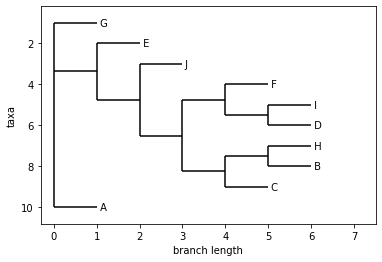

mcmcTree= '(G,(E,(J,((F,(I,D)),((H,B),C)))),A);'
goldStandardTree= '(C,(H,B),((F,(D,I)),((E,(A,G)),J)));'


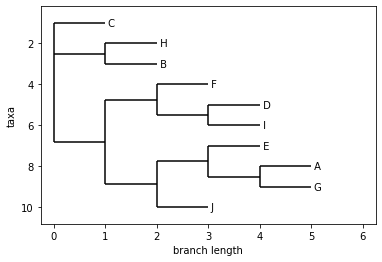

CompareTrees.calculate_rf_distance(goldStandardTree,mcmcTree)=0


In [2]:
mcmcTree = displayAndReturnTree("C:/Users/yasha/Github/ersp22-vigoda/treegen/results/8189_data.nex.trprobs")

print(f"{mcmcTree= }")

with open("C:/Users/yasha/Github/ersp22-vigoda/treegen/results/8189_tree.txt") as file:
    goldStandardTree = file.read()

print(f"{goldStandardTree= }")
CompareTrees.displayTree(goldStandardTree)
print(f"{CompareTrees.calculate_rf_distance(goldStandardTree,mcmcTree)=}")

#print(f"{distance=}")